## Vary lambda, the entry/exit rate for the sensors

We fix the period of the temperature function to be $T = 15$, and the window length at which to observe these dimensions to be 1/2 the period.

We then vary the birth/death rate for the sensor model, and the dimension of the sliding window embedding. The sensor lifetimes are simulated up to $2T,$ and our dynamic network is sampled up to time $2T$ such that the time interval between each of them is $\tau = (T/2)/\text{dim}.$ Then taking a sliding window embedd ing of dimension $\text{dim}$ will have a window length of $T/2$ exactly.

Intuitively we expect a smaller value of the birth/death rate to yield cleaner observations of periodicity, and higher max pers than higher values, which would correspond to noisier samples.

In [35]:
from __future__ import division
import numpy as np
import sys
import os
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial.distance import squareform
import importlib
import scipy.spatial as sp

## Load in sphere code
sys.path.append('../2d_graph_example/')
import SphereExample as sphere
import ContinuousTimeSphereModel as ctsm

## Load in d.n. analysis code
sys.path.append('../shared_scripts/')
import graph_fns as gf
import persistence_fns as pf
import sliding_window_fns as sw
from ripser import ripser, plot_dgms
from sklearn import manifold

from importlib import reload
reload(ctsm)

<module 'ContinuousTimeSphereModel' from '../2d_graph_example/ContinuousTimeSphereModel.py'>

In [27]:
#Pick the window length to be half the period

## Create the dynamic network
T = 15 # Period 

obsfn = lambda t, p: sphere.periodic_northsouth_modulated(t,p,T)
edge_wtsfn = lambda hull_obj: sphere.get_edge_wts(hull_obj, alpha = 1.0) #what is alpha?

## Vary Birth/Death rate of the sensors, and dimension
bd_rate_test_values = 0.5*np.arange(1,20)
dim_test_values = range(5,12)

mpers_results = np.zeros((len(bd_rate_test_values),len(dim_test_values)))
top_diff_results = np.zeros((len(bd_rate_test_values),len(dim_test_values)))

for i,bd_rate in enumerate(bd_rate_test_values):
    for j,d in enumerate(dim_test_values):
        print(bd_rate,d)
        
        # resample sensor lifetimes with different birth/death rates
        sensor_lifetimes = ctsm.get_sensor_lifetimes(2*T, bd_rate, bd_rate)

        # resample dynamic network 
        wl = T/2 #fix the window length
        tau = wl/d
        ts = np.arange(0,2*T,tau) 
        
        (node_wts, edge_wts, allpoints) = ctsm.sample_dynamic_network(sensor_lifetimes, ts, obsfn = obsfn,
                                    edge_wtsfn = edge_wtsfn)
        
        PDs = sphere.apply_pipeline(node_wts,edge_wts, d = d, tau = 1, lamda=1, phi=sphere.linear_phi_fn) # get the PDs
        res = (sphere.get_maximum_persistence(PDs)[1],sphere.get_top_diff_persistence(PDs)[1], sphere.get_num_features(PDs)[1])
        print(res)

        mpers_results[i,j] = res[0]
        top_diff_results[i,j] = res[1]

0.5 5
(1.690457820892334, 1.690457820892334, 1)
0.5 6
(2.128709077835083, 2.0429754257202148, 5)
0.5 7
(2.7128901481628418, 2.6345927715301514, 3)
0.5 8
(3.0921370983123779, 2.8674552440643311, 4)
0.5 9


KeyboardInterrupt: 

<Figure size 432x288 with 0 Axes>

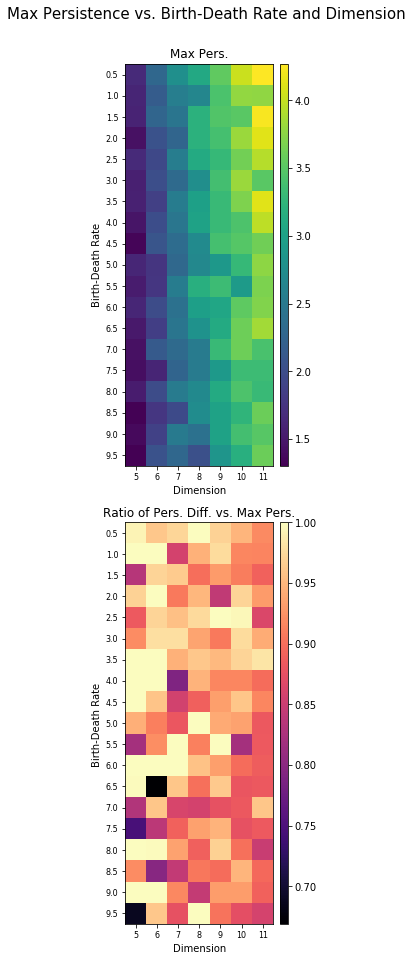

In [25]:
## Plot the results

from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable

plt.gcf().clear()
fig, axs = plt.subplots(2,1, figsize = (7,14))

ticksize = 8

im1 = axs[0].imshow(mpers_results)

axs[0].set_xlabel('Dimension')
axs[0].set_xticks(np.arange(len(dim_test_values)))
axs[0].set_xticklabels(labels = list(dim_test_values),fontsize = ticksize)

axs[0].set_ylabel('Birth-Death Rate')
axs[0].set_yticks(np.arange(len(bd_rate_test_values)))
axs[0].set_yticklabels(labels = list(np.around(bd_rate_test_values,2)),fontsize = ticksize)

axs[0].set_title('Max Pers.')

divider1 = make_axes_locatable(axs[0])
cax1 = divider1.append_axes('right', size='5%', pad=0.1)
fig.colorbar(im1,cax1,orientation = 'vertical')

### Do the other plot ###

im2 = axs[1].imshow(np.divide(top_diff_results,mpers_results),cmap = plt.cm.magma)

axs[1].set_xlabel('Dimension')
axs[1].set_xticks(np.arange(len(dim_test_values)))
axs[1].set_xticklabels(labels = list(dim_test_values), fontsize = ticksize)


axs[1].set_ylabel('Birth-Death Rate ')
axs[1].set_yticks(np.arange(len(bd_rate_test_values)))
axs[1].set_yticklabels(labels = list(np.around(bd_rate_test_values,2)),fontsize = ticksize)
axs[1].set_title('Ratio of Pers. Diff. vs. Max Pers.')

divider2 = make_axes_locatable(axs[1])
cax2 = divider2.append_axes('right', size='5%', pad=0.1)
fig.colorbar(im2,cax2)

fig.tight_layout(rect=[0, 0.03, 1, 0.95])

fig.suptitle('Max Persistence vs. Birth-Death Rate and Dimension', fontsize = 15)
plt.savefig('CtsExBirthRate'.format(len(bd_rate_test_values),len(dim_test_values),T))

plt.show()

In [50]:
##  Since the above process is random - we average over different generations of the process
T = 15
wl = T/2
bd_rates = 0.5*np.arange(1,10)
dim_vals = range(13,20)

runs = 10
mpers_res = np.zeros((len(bd_rates),len(dim_vals)))
for i in range(runs):
    mpers_res = mpers_res + ctsm.vary_birth_death_params(T, wl, bd_rates, dim_vals)

0.5 13
(5.0799546241760254, 5.0203666687011719, 6)
0.5 14
(5.1126775741577148, 4.988154411315918, 8)
0.5 15
(5.7755175828933716, 5.6166553497314453, 8)
0.5 16
(5.6487488746643066, 5.1993613243103027, 17)
0.5 17
(5.6562035083770752, 5.2208786010742188, 13)
0.5 18
(6.3732362985610962, 6.1515909433364868, 17)
0.5 19
(6.6889133453369141, 6.3404800891876221, 18)
1.0 13
(4.6027083396911621, 4.2598745822906494, 14)
1.0 14
(4.7356209754943848, 4.6256119012832642, 10)
1.0 15
(5.5604343414306641, 4.9852323532104492, 16)
1.0 16
(5.3993079662322998, 4.7091610431671143, 16)
1.0 17
(6.3483084440231323, 6.105987548828125, 15)
1.0 18
(5.8028080463409424, 5.1145493984222412, 19)
1.0 19
(6.2847745418548584, 6.0270322561264038, 16)
1.5 13
(4.9114179611206055, 4.6048736572265625, 14)
1.5 14
(5.1451218128204346, 4.9702150821685791, 11)
1.5 15
(5.4553914070129395, 5.2165472507476807, 16)
1.5 16
(5.5575559139251709, 5.3175389766693115, 17)
1.5 17
(5.2078990936279297, 4.9281044006347656, 11)
1.5 18
(5.8402354

(5.7313129901885986, 5.6107814311981201, 17)
2.5 19
(6.3001375198364258, 5.7889249324798584, 18)
3.0 13
(4.3954737186431885, 4.108532190322876, 13)
3.0 14
(4.5239486694335938, 4.2402286529541016, 14)
3.0 15
(4.9258389472961426, 4.5902080535888672, 7)
3.0 16
(5.0289621353149414, 4.3604273796081543, 11)
3.0 17
(5.4127733707427979, 4.8546721935272217, 14)
3.0 18
(5.5186569690704346, 5.3301410675048828, 10)
3.0 19
(6.2600386142730713, 5.7062371969223022, 20)
3.5 13
(4.5389184951782227, 4.0967212915420532, 15)
3.5 14
(4.3285834789276123, 4.1014151573181152, 14)
3.5 15
(5.2565977573394775, 4.8880268335342407, 12)
3.5 16
(5.2236118316650391, 5.0542564392089844, 12)
3.5 17
(5.413095235824585, 5.2533948421478271, 14)
3.5 18
(5.672199010848999, 5.3299319744110107, 15)
3.5 19
(5.7969708442687988, 5.5321705341339111, 20)
4.0 13
(4.1894972324371338, 3.8501744270324707, 9)
4.0 14
(4.9363458156585693, 4.4698309898376465, 14)
4.0 15
(5.1744861602783203, 4.705999493598938, 14)
4.0 16
(5.194478750228881

(5.8386480808258057, 5.6366860866546631, 12)
0.5 17
(5.9494810104370117, 5.7007992267608643, 16)
0.5 18
(6.0669841766357422, 5.9129443168640137, 17)
0.5 19
(6.9271345138549805, 6.6012805700302124, 19)
1.0 13
(4.9909563064575195, 4.5306800603866577, 13)
1.0 14
(5.2767372131347656, 5.1588960886001587, 7)
1.0 15
(5.2127954959869385, 4.8058328628540039, 15)
1.0 16
(5.7317299842834473, 5.3926589488983154, 13)
1.0 17
(6.0560612678527832, 5.8416967391967773, 17)
1.0 18
(6.2629108428955078, 6.2023396492004395, 5)
1.0 19
(6.3528561592102051, 5.7481427192687988, 20)
1.5 13
(4.9311118125915527, 4.6293530464172363, 11)
1.5 14
(4.9157710075378418, 4.563434362411499, 14)
1.5 15
(5.0576972961425781, 4.5859692096710205, 15)
1.5 16
(5.6021595001220703, 5.0905568599700928, 15)
1.5 17
(5.7240495681762695, 5.4221887588500977, 18)
1.5 18
(5.8576242923736572, 5.6302473545074463, 17)
1.5 19
(6.0007567405700684, 5.8863935470581055, 21)
2.0 13
(4.6297652721405029, 4.3517966270446777, 13)
2.0 14
(5.293283224105

(4.8029055595397949, 4.193256139755249, 14)
3.0 15
(4.7081539630889893, 3.9872643947601318, 17)
3.0 16
(4.9697029590606689, 4.5474159717559814, 10)
3.0 17
(5.5536797046661377, 5.0278215408325195, 18)
3.0 18
(5.8635601997375488, 5.6003062725067139, 17)
3.0 19
(5.3733346462249756, 5.1052718162536621, 19)
3.5 13
(4.1930193901062012, 3.7917947769165039, 13)
3.5 14
(4.6748008728027344, 4.4757671356201172, 6)
3.5 15
(4.9653356075286865, 4.4275715351104736, 16)
3.5 16
(5.1230978965759277, 4.5604465007781982, 17)
3.5 17
(5.4621989727020264, 5.2537109851837158, 16)
3.5 18
(4.8187174797058105, 4.6219453811645508, 17)
3.5 19
(6.3757743835449219, 6.0587939023971558, 14)
4.0 13
(4.7098758220672607, 4.1534280776977539, 13)
4.0 14
(4.8613219261169434, 4.6572558879852295, 15)
4.0 15
(4.9548642635345459, 4.8441691398620605, 5)
4.0 16
(5.2268874645233154, 4.6117386817932129, 7)
4.0 17
(4.8959493637084961, 4.6897585391998291, 16)
4.0 18
(5.4999854564666748, 5.4333202838897705, 9)
4.0 19
(5.66026735305786

<Figure size 432x288 with 0 Axes>

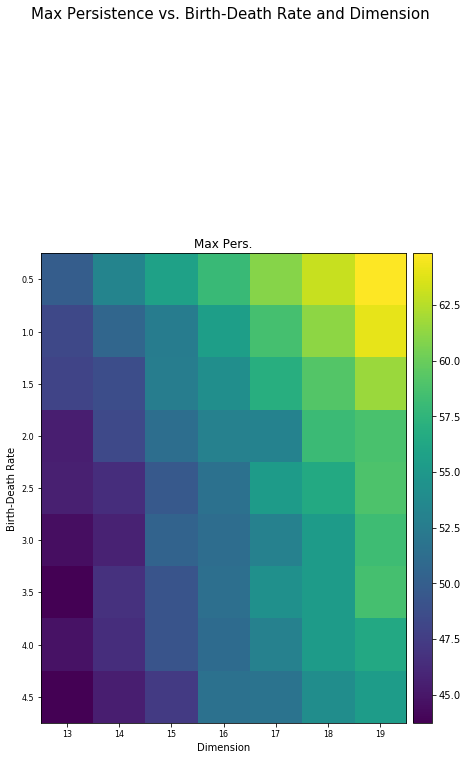

In [51]:
## plot the results
plt.gcf().clear()
fig, axs = plt.subplots(1,1, figsize = (7,14))

ticksize = 8
bd_rate_test_values = bd_rates
dim_test_values = dim_vals

im1 = axs.imshow(mpers_res)

axs.set_xlabel('Dimension')
axs.set_xticks(np.arange(len(dim_test_values)))
axs.set_xticklabels(labels = list(dim_test_values),fontsize = ticksize)

axs.set_ylabel('Birth-Death Rate')
axs.set_yticks(np.arange(len(bd_rate_test_values)))
axs.set_yticklabels(labels = list(np.around(bd_rate_test_values,2)),fontsize = ticksize)

axs.set_title('Max Pers.')

divider1 = make_axes_locatable(axs)
cax1 = divider1.append_axes('right', size='5%', pad=0.1)
fig.colorbar(im1,cax1,orientation = 'vertical')

fig.suptitle('Max Persistence vs. Birth-Death Rate and Dimension', fontsize = 15)
plt.savefig('CtsExBirthRateAveraged_bd{}_dim{}_T{}'.format(len(bd_rate_test_values),len(dim_test_values),T))
plt.show()